# Segement Anthing + 3D Box

![gdgligen](https://github.com/IDEA-Research/Grounded-Segment-Anything/raw/main/assets/mask_3dbox.png)

**Why this project?**
[Segment Anything](https://github.com/facebookresearch/segment-anything) and its following projects
focus on 2D images. In this project, we extend the scope to 3D world by combining [Segment Anything](https://github.com/facebookresearch/segment-anything) and [VoxelNeXt](https://github.com/dvlab-research/VoxelNeXt). When we provide a prompt (e.g., a point / box), the result is not only 2D segmentation mask, but also 3D boxes.

The core idea is that [VoxelNeXt](https://github.com/dvlab-research/VoxelNeXt) is a fully sparse 3D detector. It predicts 3D object upon each sparse voxel. We project 3D sparse voxels onto 2D images. And then 3D boxes can be generated for voxels in the SAM mask. 

- This project makes 3D object detection to be promptable.
- VoxelNeXt is based on sparse voxels that are easy to be related to the mask generated from segment anything.
- This project could facilitate 3D box labeling. 3D box can be obtained via a simple click on image. It might largely save human efforts, especially on autonuous driving scenes.

In [1]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from voxelnext_3d_box.model import Model
from voxelnext_3d_box.utils.image_projection import get_data_info, _draw_3dbox
from voxelnext_3d_box.utils.config import cfg, cfg_from_yaml_file

OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k
OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k


In [2]:
cfg_model = 'voxelnext_3d_box/config.yaml'
device = 'cpu'
model_cfg = cfg_from_yaml_file(cfg_model, cfg)
model_cfg.SAM_TYPE = "vit_b"
model_cfg.SAM_CHECKPOINT = "/data/sam_vit_b_01ec64.pth"
model_cfg.VOXELNEXT_CHECKPOINT = "/data/voxelnext_nuscenes_kernel1.pth"
model = Model(model_cfg, device)

In [3]:
lidar2img_rt = np.array([[-1149.5,  940.9,  8.1, -646.8],
                         [-442.2, -114.6, -1270.2, -519.6],
                         [-0.95, -0.32, -0.03, -0.43],
                         [ 0,  0,  0, 1]])
image_path = "assets/n015-2018-08-02-17-16-37+0800__CAM_BACK_LEFT__1533201470447423.jpg"
image_id = image_path.split('/')[-1].rstrip("jpg")
point_dict = {"points": np.load("points_demo.npy")}

In [4]:
image = cv2.imread(image_path)
prompt_point = np.array([[560, 500]])
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)

/home/chenyukang/miniconda3/envs/centerpoint2/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


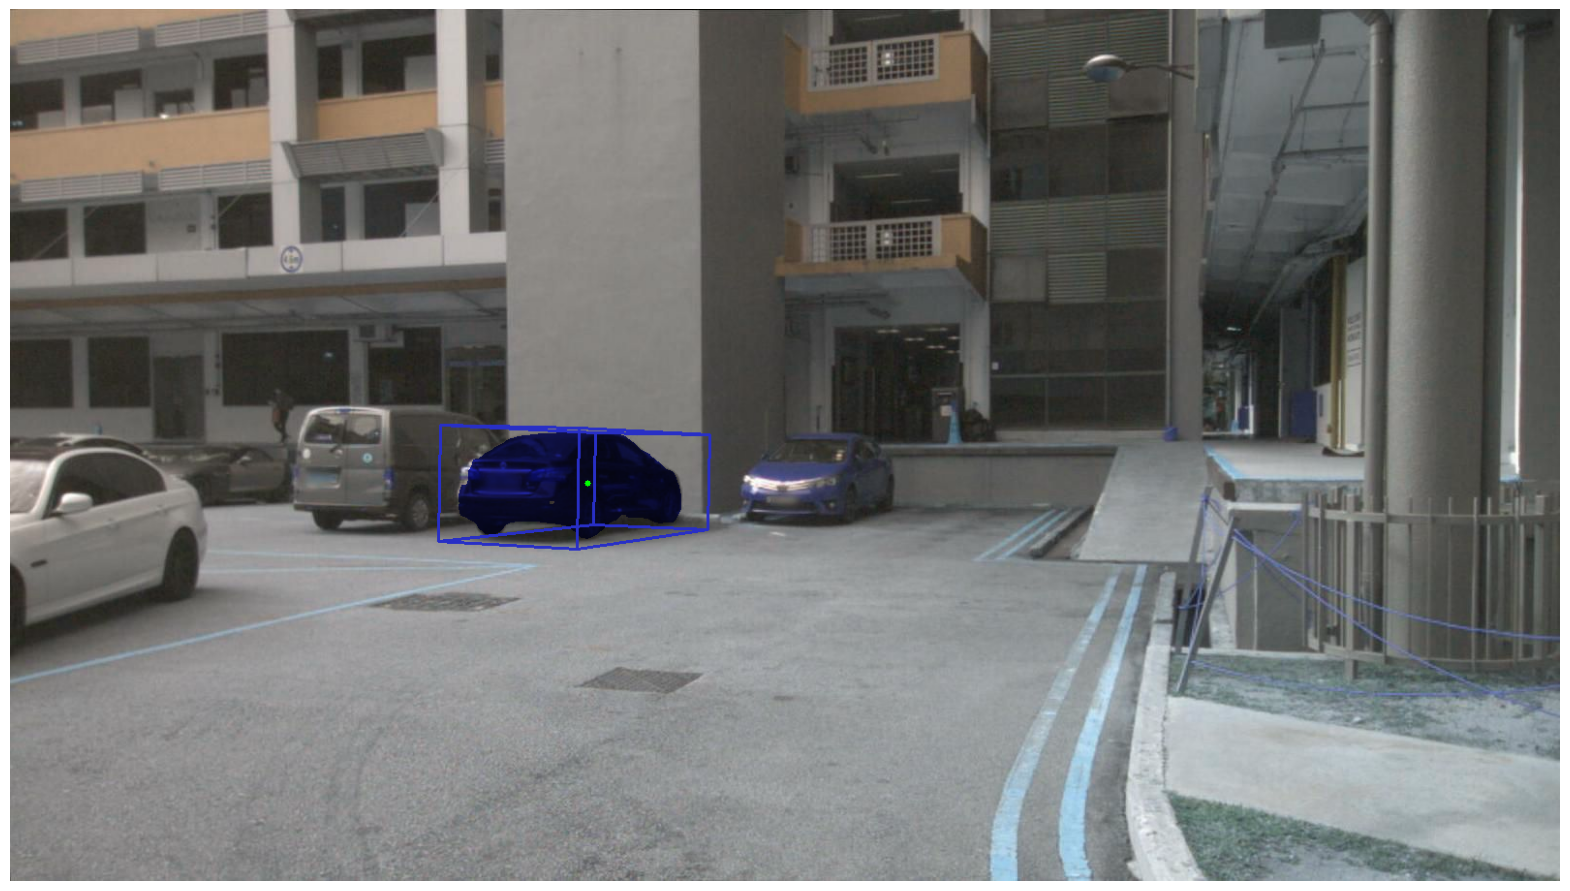

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

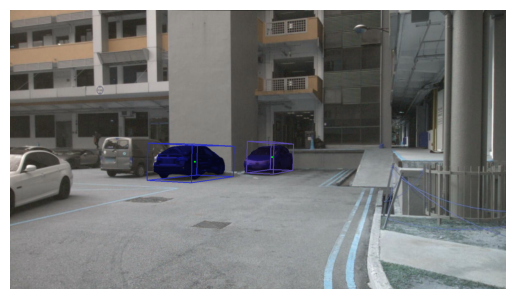

In [6]:
prompt_point = np.array([[820, 480]])
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()

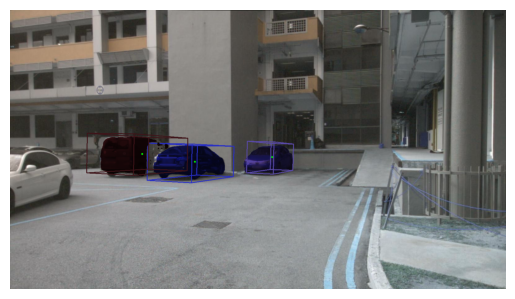

In [7]:
prompt_point = np.array([[350, 470]])
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()